# Introduction to Inference

https://rafalab.github.io/dsbook/inference.html#polls

AFAEL IRIZARRY: Opinion polling has been conducted since the 19th century.
The general goal of these is to describe the opinions held
by a specific population on a given set of topics.
In recent times, these polls have been pervasive
during presidential elections.

Polls are useful when asking everybody in the population
is logistically impossible.
The general strategy is to ask a smaller group, usually chosen at random,
and then infer the opinions of the entire population
from the opinions of the smaller group.

Statistical theory is used to justify the process.
This theory is referred to as inference and is the main topic of this module.
Perhaps the best known opinion polls are those
conducted to determine which candidate is preferred
by voters in a given election.

Political strategists make extensive use of polls
to determine, for example, how to invest resources.
For example, they may want to know which geographical location to focus
"get out the vote" efforts.

Elections are a particularly interesting case of opinion polls,
because the actual opinion of the entire population is revealed on Election Day.
Of course, it costs millions of dollars to run an actual election, which
makes polling a cost effective strategy for those
that want to forecast the election.

Although typically the results of the polls run by political strategists
are kept private, similar polls are conducted by news organizations
because the results tend to be of interest to the general public,
and these are often made public.

We will eventually be looking at these data.
RealClearPolitics is an example of a news aggregator
that organizes and publishes poll results.
For example, here are examples of polls reporting
estimates of the popular vote for the 2016 presidential election.
Although in the United States the popular vote
does not determine the result of the election,
we use it here as an illustrative and simple example of how well polls work.
Forecasting the election is a more complex process
since it involves combining results from the 50 states and DC.
All right.

Let's make some observations about the table we just showed.
First, note that different polls, all taken days before the election, report
a different spread, the estimated difference between support
for the two candidates.

Note also that the reported spreads hover around
what ended up being the actual result. Clinton won the popular vote by 2.1%.
We also see a column titled "MOE," which stands for margin of error.

In this module, we show how the probability concepts
we learned in the previous module can be applied
to develop the statistical approaches that make polls an effective tool.
We will learn the statistical concepts necessary to define
estimates and margins of errors, and show
how we can use these to forecast final results relatively well
and also provide an estimate of the precision of our forecast.

Once we learn this, we will be able to understand
two concepts that are ubiquitous in data science, confidence
intervals and p-values.
We start by connecting probability theory to the task of using polls
to learn about a population.

# Sampling Model Parameters and Estimates

http://rafalab.dfci.harvard.edu/dsbook/

https://leanpub.com/datasciencebook

RAFAEL IRIZARRY: To help us understand the connection between polls
and the probability theory that we have learned, let's
construct a scenario that we can work through together
and that is similar to the one that pollsters face.
We will use an urn instead of voters.

And because pollsters are competing with other pollsters for media attention,
we will imitate that by having our competition with a $25 prize.
The challenge is to guess the spread between the proportion
of blue and red balls in this urn.
Before making a prediction, you can take a sample, with replacement,
from the urn.

To mimic the fact that running polls is expensive,
it will cost you $0.10 per bead you sample.
So if your sample size is 250 and you win,
you'll break even, as you'll have to pay me $25 to collect your $25.
Your entry into the competition can be an interval.
If the interval you submit contains the true proportion,
you get half what you paid and pass to the second phase of the competition.
In the second phase of the competition, the entry with the smallest interval
is selected as the winner.

The dslabs package includes a function that shows a random draw from the urn
that we just saw.
Here's the code that you can write to see a sample.
And here is a sample with 25 beads.
OK, now that you know the rules, think about how
you would construct your interval.
How many beads would you sample, et cetera?
Notice that we have just described a simple sampling
model for opinion polls.

The beads inside the urn represent the individuals
that will vote on election day.
Those that will vote Republican are represented with red beads
and the Democrats with blue beads.
For simplicity, assume there are no other colors,
that there are just two parties.
**We want to predict the proportion of blue beads in the urn**.
**Let's call this quantity p, which in turn tells us
the proportion of red beads, 1 minus p, and the spread, p minus (1 minus p),
which simplifies to 2p minus 1.**

In statistical textbooks, the beads in the **urn are called the population**.
The **proportion of blue beads in the population, p, is called a parameter**.
The 25 beads that we saw in an earlier plot after we sampled,
that's called a sample.

The task of **statistical inference is to predict the parameter, p, using
the observed data in the sample**.
Now, can we do this with just the 25 observations we showed you?
Well, they are certainly informative.

For example, given that we see 13 red and 12 blue,
it is unlikely that p is bigger than 0.9 or smaller than 0.1.
Because if they were, it would be un-probable to see 13 red and 12 blue.
But are we ready to predict with certainty that there
are more red beads than blue?
OK, **what we want to do is construct an estimate of p
using only the information we observe**.

An estimate can be thought of as a summary of the observed data
that we think is informative about the parameter of interest.
It seems intuitive to think that the proportion of blue beads in the sample,
which in this case is 0.48, must be at least related to the actual proportion
p.

But do we simply predict p to be 0.48?
**First, note that the sample proportion is a random variable**.
If we run the command take_poll(25), say four times,
we get four different answers.

Each time the sample is different and the sample proportion is different.
**The sample proportion is a random variable**.
Note that in the four random samples we show,
the sample proportion ranges from 0.44 to 0.6.
**By describing the distribution of this random variable,
we'll be able to gain insights into how good this estimate is
and how we can make it better.**

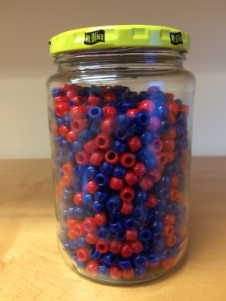

## Key Points:


The task of statistical inference is to estimate an unknown population parameter using observed data from a sample.
In a sampling model, the collection of elements in the urn is called the population.
A parameter is a number that summarizes data for an entire population.
A sample is observed data from a subset of the population.

An estimate is a summary of the observed data about a parameter that we believe is informative. It is a data-driven guess of the population parameter.

We want to predict the proportion of the blue beads in the urn, the parameter . 

The proportion of red beads in the urn is  $$1 - p $$

and the spread is  $$p - (1 - p) = 2p - 1$$

The sample proportion is a random variable. Sampling gives random results drawn from the population distribution.

```R
library(tidyverse)
library(dslabs)
take_poll(25)
```


# The Sample Average

RAFAEL IRIZARRY: Taking an opinion poll is being modeled
as taking a random sample from an urn.
We are proposing the use of the proportion of blue beads in our sample
as an estimate of the parameter p.

Once we have this estimate, we can easily
report an estimate of the spread, 2p minus 1.
But for simplicity, we will illustrate the concept of statistical inference
for estimating p.

We will use our knowledge of probability to defend our use of the sample
proportion, and quantify how close we think
it is from the population proportion p.
We start by defining the random variable X. X is
going to be 1 if we pick a blue bead at random, and 0 if it's red.
This implies that we're assuming that the population, the beads in the urn,
are a list of 0s and 1s.

If we sample N beads, then the average of the draws X_1 through X_N
is equivalent to the proportion of blue beads in our sample.
This is because adding the Xs is equivalent to counting the blue beads,
and dividing by the total N turns this into a proportion.
We use the symbol X-bar to represent this average.
In general, in statistics textbooks, a bar on top of a symbol
means the average.

The theory we just learned about the sum of draws
becomes useful, because we know the distribution of the sum N times X-bar.
We know the distribution of the average X-bar,
because N is a non random constant.
For simplicity, let's assume that the draws are independent.
After we see each sample bead, we return it to the urn.
It's a sample with replacement.

In this case, what do we know about the distribution of the sum of draws?
First, we know that the expected value of the sum of draws
is N times the average of the values in the urn.
We know that the average of the 0s and 1s in the urn
must be the proportion p, the value we want to estimate.
Here, we encounter an important difference
with what we did in the probability module.
We don't know what is in the urn.

We know there are blue and red beads, but we don't know how many of each.
This is what we're trying to find out.
We're trying to estimate p.

Just like we use variables to define unknowns in systems of equations,
in statistical inference, we define parameters
to define unknown parts of our models.
In the urn model we are using to mimic an opinion poll,
we do not know the proportion of blue beads in the urn.
We define the parameter p to represent this quantity.
We are going to estimate this parameter.

Note that the ideas presented here, on how we estimate parameters
and provide insights into how good these estimates are,
extrapolate to many data science tasks.
For example, we may ask, what is the difference
in health improvement between patients receiving treatment and a control
group?

We may ask, what are the health effects of smoking on a population?
What are the differences in racial groups of fatal shootings by police?
What is the rate of change in life expectancy in the US during the last 10
years?
All these questions can be framed as a task of estimating
a parameter from a sample.

## Key Points:

- Many common data science tasks can be framed as estimating a parameter from a sample.

- We illustrate statistical inference by walking through the process to estimate . From the estimate of p, we can easily calculate an estimate of the spread, $$2p - 1$$.

- Consider the random variable $$X$$  that is 1 if a blue bead is chosen and 0 if a red bead is chosen. The proportion of blue beads in $$N$$ draws is the average of the draws $$X_1 , ..., X_N$$


- X̂ is the sample average. In statistics, a bar on top of a symbol denotes the average. X̂ is a random variable because it is the average of random draws - each time we take a sample, X̂ is different.

$$X̄ = \frac{X_1 + ... + X_N}{N}$$

- The number of blue beads drawn in N draws, $$N X̄$$, is N times the proportion of values in the urn. However, we do knot know the proportion: we are trying to estimate the parameter $$p$$.



# Properties of our Estimate

RAFAEL IRZARRY: To understand how good our estimate is,
we'll describe the statistical properties of the random variable we
just defined, the sample proportion.
Note that if we multiply by N, N times X bar is the sum of independent draws.
So the rules we cover in the probability module apply.
Using what we have learned, the expected value of the sum N times X bar
is N times the average of the urn, p.

So dividing by the non-random constant N gives us
that the expected value of the average X bar is p.
We can write it using our mathematical notation like this.
We also can use what we learned to figure out the standard error.
We know that the standard error of the sum is square root of N
times a standard deviation of the values in the urn.
Can we compute the standard error of the urn?

We learn a formula that tells us that it's
1 minus 0 times the square root of p times 1 minus p,
which is the square root of p times 1 minus p.
Because we are dividing by the sum N, we arrive at the following formula
for the standard error of the average.

The standard error of the average is square root of p times 1 minus p
divided by the square root of N. This result reveals the power of polls.
The expected value of the sample proportion X bar
is the parameter of interest p, and we can
make the standard error as small as we want by increasing the sample size N.
The law of large numbers tells us that with a large enough poll,
our estimate converges to p.

If we take a large enough poll to make our standard error, say, about 0.01,
we'll be quite certain about who will win.
But how large does the poll have to be for the standard error
to be this small?

One problem is that we do not know p, so we can't actually
compute the standard error.

For illustrative purposes, let's assume that p is 0.51
and make a plot of the standard error versus a sample size N. Here it is.
We can see that, obviously, it's dropping.
From the plot we also see that we would need a poll of over 10,000 people
to get the standard error as low as we want it to be.
We rarely see polls of this size, due in part to cost.
We'll give other reasons later.

From the RealClearPolitics table we saw earlier,
we learn that the sample sizes in opinion polls range from 500 to 3,500.
For a sample size of 1,000, if we set p to be 0.51,
the standard error is about 0.15, or 1.5 percentage points.
So even with large polls for close elections,
X bar can lead us astray if we don't realize it's a random variable.
But we can actually say more about how close we can get to the parameter p.
We'll do that in the next video.

## Key Points:

- When interpreting values of $$X̄$$, it is important to remember that $$X̄$$ is a random variable with an expected value and standard error that represents the sample proportion of positive events.

- The expected value of $$X̄$$ is the parameter of interest $$p$$. This follows from the fact that  $$X̄$$ is the sum of independent draws of a random variable times a constant $$\frac{1}{N}$$.

$$E(X̄) = p$$

- As the number of draws $$N$$ increases, the standard error of our estimate  X̄ decreases. The standard error of the average of X̄ over N draws is:

$$SE(X̄) = \frac{\sqrt{p(1-p)}}{\sqrt{N}}$$

- In theory, we can get more accurate estimates of $$p$$ by increasing N. In practice, there are limits on the size of N due to costs, as well as other factors we discuss later.

- We can also use other random variable equations to determine the expected value of the sum of draws $$E (S)$$ and standard error of the sum of draws $$SE (S)$$.

$$E(S) = Np$$

$$SE (S) = \sqrt{Np(1-p)}$$

# The Central Limit Theorem in Practice

RAFAEL IRIZARRY: The central limit theorem
tells us that the distribution function for a sum of draws
is approximately normal.

We also learned that when dividing a normally
distributed random variable by a nonrandom constant,
the resulting random variable is also normally distributed.
This implies that the distribution of X-bar is approximately normal.
So in summary, we have that X-bar has an approximately normal distribution.
And in a previous video, we determined that the expected value is p,
and the standard error is the square root of p times 1 minus p
divided by the sample size N.

Now, how does this help us?
Let's ask an example question.
Suppose we want to know what is the probability that we
are within one percentage point from p-- that we
made a very, very good estimate?
So we're basically asking, what's the probability
that the distance between X-bar and p, the absolute value of X-bar minus p,
is less than 0.01, 1 percentage point.

We can use what we've learned to see that this is the same as asking, what
is the probability of X-bar being less than or equal to p plus 0.01
minus the probability of X-bar being less than or equal to p minus 0.01.
Now, can we answer the question now?
Can we compute that probability?
Note that we can use the mathematical trick
that we learned in the previous module.
What was that trick?

We subtract the expected value and divide
by the standard error on both sides of the equation.
What this does is it gives us a standard normal variable, which we have been
calling capital Z, on the left side.

And we know how to make calculations for that.
Since p is the expected value, and the standard error of X-bar
is the square root of p times 1 minus p divided by N,
we get that the probability that we were just calculating
is equivalent to probability of Z, our standard normal variable,
being less than 0.01 divided by the standard error of X-bar
minus the probability of Z being less than negative 0.01
divided by that standard error of X-bar.
OK, now can we compute this probability?
Not yet.

Our problem is that we don't know p.
So we can't actually compute the standard error of X-bar
using just the data.

But it turns out-- and this is something new we're showing you--
that the CLT still works if we use an estimate of the standard error that,
instead of p, uses X-bar in its place.
We say this is a plug-in estimate.
We call this a plug-in estimate.

Our estimate of the standard error is therefore
the square root of X-bar times 1 minus X-bar divided by N. Notice,
we changed the p for the X-bar.
In the mathematical formula we're showing you,
you can see a hat on top of the SE.

In statistics textbooks, we use a little hat like this to denote estimates.
This is an estimate of the standard error, not the actual standard error.
But like we said, the central limit theorem still works.
Note that, importantly, that this estimate can actually
be constructed using the observed data.
Now, let's continue our calculations.

But now instead of dividing by the standard error,
we're going to divide by this estimate of the standard error.
Let's compute this estimate of the standard error for the first sample
that we took, in which we had 12 blue beads and 13 red beads.
In that case, X-bar was 0.48.
So to compute the standard error, we simply write this code.
And we get that it's about 0.1.

So now, we can answer the question.
Now, we can compute the probability of being as close to p as we wanted.
We wanted to be 1 percentage point away.
The answer is simply pnorm of 0.01--
that's 1 percentage point--
divided by this estimated se minus pnorm of negative 0.01
divided by the estimated se.

We plug that into R, and we get the answer.
The answer is that the probability of this happening is about 8%.
So there is a very small chance that we'll be as close
as this to the actual proportion.

Now, that wasn't very useful, but what it's going to do,
what we're going to be able to do with the central limit theorem
is determine what sample sizes are better.
And once we have those larger sample sizes,
we'll be able to provide a very good estimate and some very informative
probabilities.

# Key Points


- Because X̄ is the sum of random draws divided by a constant, the distribution of X̄ is approximately normal.

- We can convert  to a standard normal random variable : $$Z = \frac{X̄ - E(X̄)}{SE(X̄)}$$

- The probability that X̄ is within .01 of the actual value of p is:



<math xmlns="http://www.w3.org/1998/Math/MathML">
  <maction id="MJX-Collapse-8" actiontype="toggle" selection="2" data-semantic-complexity="3">
    <mtext data-semantic-complexity="3">&#x25C2;...&#x25B8;</mtext>
    <mrow data-semantic-complexity="29" data-semantic-collapsed="(55 (c 52 53 54) 0 51 22 50)" data-semantic-children="0,51,22,50" data-semantic-id="55" data-semantic-role="text" data-semantic-type="punctuated">
      <mrow>
        <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1.5">
          <mtext data-semantic-type="text" data-semantic-role="prefix function" data-semantic-font="normal" data-semantic-id="0" data-semantic-parent="55" data-semantic-complexity="1.5">Pr</mtext>
        </mstyle>
        <mrow data-semantic-type="postfixop" data-semantic-role="subtraction" data-semantic-id="51" data-semantic-children="46" data-semantic-content="21" data-semantic-parent="55" data-semantic-complexity="10">
          <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="46" data-semantic-children="45" data-semantic-content="1,20" data-semantic-parent="51" data-semantic-complexity="7">
            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="1" data-semantic-parent="46" data-semantic-operator="fenced" data-semantic-complexity="1">(</mo>
            <maction id="MJX-Collapse-5" actiontype="toggle" selection="2" data-semantic-complexity="2">
              <mtext data-semantic-complexity="2">&#x25C2;&#x2264;&#x25B8;</mtext>
              <mrow data-semantic-type="relseq" data-semantic-role="inequality" data-semantic-id="45" data-semantic-children="2,44" data-semantic-content="3" data-semantic-parent="46" data-semantic-complexity="20">
                <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="45" data-semantic-complexity="1">Z</mi>
                <mo data-semantic-type="relation" data-semantic-role="inequality" data-semantic-id="3" data-semantic-parent="45" data-semantic-operator="relseq,&#x2264;" data-semantic-complexity="1">&#x2264;</mo>
                <mrow data-semantic-type="infixop" data-semantic-role="division" data-semantic-id="44" data-semantic-children="4,19" data-semantic-content="5" data-semantic-parent="45" data-semantic-complexity="15">
                  <mn data-semantic-type="number" data-semantic-role="float" data-semantic-font="normal" data-semantic-id="4" data-semantic-parent="44" data-semantic-complexity="2">.01</mn>
                  <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="1">
                    <mo data-semantic-type="operator" data-semantic-role="division" data-semantic-id="5" data-semantic-parent="44" data-semantic-operator="infixop,/" data-semantic-complexity="1">/</mo>
                  </mrow>
                  <msqrt data-semantic-type="sqrt" data-semantic-role="unknown" data-semantic-id="19" data-semantic-children="18" data-semantic-parent="44" data-semantic-complexity="9">
                    <mrow data-semantic-type="infixop" data-semantic-role="division" data-semantic-id="18" data-semantic-children="17,13" data-semantic-content="12" data-semantic-parent="19" data-semantic-complexity="7">
                      <maction id="MJX-Collapse-3" actiontype="toggle" selection="2" data-semantic-complexity="2">
                        <mtext data-semantic-complexity="2">&#x25C2;&#x22C5;&#x25B8;</mtext>
                        <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="17" data-semantic-children="6,15" data-semantic-content="16" data-semantic-parent="18" data-semantic-complexity="16">
                          <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="17" data-semantic-complexity="1">p</mi>
                          <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="16" data-semantic-parent="17" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
                          <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="15" data-semantic-children="14" data-semantic-content="7,11" data-semantic-parent="17" data-semantic-complexity="11">
                            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="7" data-semantic-parent="15" data-semantic-operator="fenced" data-semantic-complexity="1">(</mo>
                            <mrow data-semantic-type="infixop" data-semantic-role="subtraction" data-semantic-id="14" data-semantic-children="8,10" data-semantic-content="9" data-semantic-parent="15" data-semantic-complexity="6">
                              <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="8" data-semantic-parent="14" data-semantic-complexity="1">1</mn>
                              <mo data-semantic-type="operator" data-semantic-role="subtraction" data-semantic-id="9" data-semantic-parent="14" data-semantic-operator="infixop,&#x2212;" data-semantic-complexity="1">&#x2212;</mo>
                              <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="10" data-semantic-parent="14" data-semantic-complexity="1">p</mi>
                            </mrow>
                            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="11" data-semantic-parent="15" data-semantic-operator="fenced" data-semantic-complexity="1">)</mo>
                          </mrow>
                        </mrow>
                      </maction>
                      <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="1">
                        <mo data-semantic-type="operator" data-semantic-role="division" data-semantic-id="12" data-semantic-parent="18" data-semantic-operator="infixop,/" data-semantic-complexity="1">/</mo>
                      </mrow>
                      <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="13" data-semantic-parent="18" data-semantic-complexity="1">N</mi>
                    </mrow>
                  </msqrt>
                </mrow>
              </mrow>
            </maction>
            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="20" data-semantic-parent="46" data-semantic-operator="fenced" data-semantic-complexity="1">)</mo>
          </mrow>
          <mo data-semantic-type="operator" data-semantic-role="subtraction" data-semantic-id="21" data-semantic-parent="51" data-semantic-operator="postfixop,&#x2212;" data-semantic-complexity="1">&#x2212;</mo>
        </mrow>
        <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1.5">
          <mtext data-semantic-type="text" data-semantic-role="prefix function" data-semantic-font="normal" data-semantic-id="22" data-semantic-parent="55" data-semantic-complexity="1.5">Pr</mtext>
        </mstyle>
        <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="50" data-semantic-children="49" data-semantic-content="23,43" data-semantic-parent="55" data-semantic-complexity="12">
          <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="23" data-semantic-parent="50" data-semantic-operator="fenced" data-semantic-complexity="1">(</mo>
          <mrow data-semantic-type="relseq" data-semantic-role="inequality" data-semantic-id="49" data-semantic-children="24,48" data-semantic-content="25" data-semantic-parent="50" data-semantic-complexity="7">
            <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="24" data-semantic-parent="49" data-semantic-complexity="1">Z</mi>
            <mo data-semantic-type="relation" data-semantic-role="inequality" data-semantic-id="25" data-semantic-parent="49" data-semantic-operator="relseq,&#x2264;" data-semantic-complexity="1">&#x2264;</mo>
            <maction id="MJX-Collapse-7" actiontype="toggle" selection="2" data-semantic-complexity="2">
              <mtext data-semantic-complexity="2">&#x25C2;+&#x25B8;</mtext>
              <mrow data-semantic-type="infixop" data-semantic-role="division" data-semantic-id="48" data-semantic-children="47,42" data-semantic-content="28" data-semantic-parent="49" data-semantic-complexity="18">
                <mrow data-semantic-type="prefixop" data-semantic-role="negative" data-semantic-id="47" data-semantic-children="27" data-semantic-content="26" data-semantic-parent="48" data-semantic-complexity="5">
                  <mo data-semantic-type="operator" data-semantic-role="subtraction" data-semantic-id="26" data-semantic-parent="47" data-semantic-operator="prefixop,&#x2212;" data-semantic-complexity="1">&#x2212;</mo>
                  <mn data-semantic-type="number" data-semantic-role="float" data-semantic-font="normal" data-semantic-id="27" data-semantic-parent="47" data-semantic-complexity="2">.01</mn>
                </mrow>
                <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="1">
                  <mo data-semantic-type="operator" data-semantic-role="division" data-semantic-id="28" data-semantic-parent="48" data-semantic-operator="infixop,/" data-semantic-complexity="1">/</mo>
                </mrow>
                <msqrt data-semantic-type="sqrt" data-semantic-role="unknown" data-semantic-id="42" data-semantic-children="41" data-semantic-parent="48" data-semantic-complexity="9">
                  <mrow data-semantic-type="infixop" data-semantic-role="division" data-semantic-id="41" data-semantic-children="40,36" data-semantic-content="35" data-semantic-parent="42" data-semantic-complexity="7">
                    <maction id="MJX-Collapse-6" actiontype="toggle" selection="2" data-semantic-complexity="2">
                      <mtext data-semantic-complexity="2">&#x25C2;&#x22C5;&#x25B8;</mtext>
                      <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="40" data-semantic-children="29,38" data-semantic-content="39" data-semantic-parent="41" data-semantic-complexity="16">
                        <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="29" data-semantic-parent="40" data-semantic-complexity="1">p</mi>
                        <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="39" data-semantic-parent="40" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
                        <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="38" data-semantic-children="37" data-semantic-content="30,34" data-semantic-parent="40" data-semantic-complexity="11">
                          <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="30" data-semantic-parent="38" data-semantic-operator="fenced" data-semantic-complexity="1">(</mo>
                          <mrow data-semantic-type="infixop" data-semantic-role="subtraction" data-semantic-id="37" data-semantic-children="31,33" data-semantic-content="32" data-semantic-parent="38" data-semantic-complexity="6">
                            <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="31" data-semantic-parent="37" data-semantic-complexity="1">1</mn>
                            <mo data-semantic-type="operator" data-semantic-role="subtraction" data-semantic-id="32" data-semantic-parent="37" data-semantic-operator="infixop,&#x2212;" data-semantic-complexity="1">&#x2212;</mo>
                            <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="33" data-semantic-parent="37" data-semantic-complexity="1">p</mi>
                          </mrow>
                          <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="34" data-semantic-parent="38" data-semantic-operator="fenced" data-semantic-complexity="1">)</mo>
                        </mrow>
                      </mrow>
                    </maction>
                    <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="1">
                      <mo data-semantic-type="operator" data-semantic-role="division" data-semantic-id="35" data-semantic-parent="41" data-semantic-operator="infixop,/" data-semantic-complexity="1">/</mo>
                    </mrow>
                    <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="36" data-semantic-parent="41" data-semantic-complexity="1">N</mi>
                  </mrow>
                </msqrt>
              </mrow>
            </maction>
          </mrow>
          <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="43" data-semantic-parent="50" data-semantic-operator="fenced" data-semantic-complexity="1">)</mo>
        </mrow>
      </mrow>
    </mrow>
  </maction>
</math>

- The Central Limit Theorem (CLT) still works if  X̄ is used in place of p. This is called a plug-in estimate. Hats over values denote estimates. Therefore:

$$SE(X̄) = \sqrt{\frac{X̄(1-X̄)}{N}}$$

- Using the CLT, the probability that X̄   is within .01 of the actual value of p is:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <maction id="MJX-Collapse-16" actiontype="toggle" selection="2" data-semantic-complexity="3">
    <mtext data-semantic-complexity="3">&#x25C2;...&#x25B8;</mtext>
    <mrow data-semantic-complexity="29" data-semantic-collapsed="(63 (c 60 61 62) 0 59 26 58)" data-semantic-children="0,59,26,58" data-semantic-id="63" data-semantic-role="text" data-semantic-type="punctuated">
      <mrow>
        <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1.5">
          <mtext data-semantic-type="text" data-semantic-role="prefix function" data-semantic-font="normal" data-semantic-id="0" data-semantic-parent="63" data-semantic-complexity="1.5">Pr</mtext>
        </mstyle>
        <mrow data-semantic-type="postfixop" data-semantic-role="subtraction" data-semantic-id="59" data-semantic-children="54" data-semantic-content="25" data-semantic-parent="63" data-semantic-complexity="10">
          <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="54" data-semantic-children="53" data-semantic-content="1,24" data-semantic-parent="59" data-semantic-complexity="7">
            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="1" data-semantic-parent="54" data-semantic-operator="fenced" data-semantic-complexity="1">(</mo>
            <maction id="MJX-Collapse-13" actiontype="toggle" selection="2" data-semantic-complexity="2">
              <mtext data-semantic-complexity="2">&#x25C2;&#x2264;&#x25B8;</mtext>
              <mrow data-semantic-type="relseq" data-semantic-role="inequality" data-semantic-id="53" data-semantic-children="2,52" data-semantic-content="3" data-semantic-parent="54" data-semantic-complexity="20">
                <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="53" data-semantic-complexity="1">Z</mi>
                <mo data-semantic-type="relation" data-semantic-role="inequality" data-semantic-id="3" data-semantic-parent="53" data-semantic-operator="relseq,&#x2264;" data-semantic-complexity="1">&#x2264;</mo>
                <mrow data-semantic-type="infixop" data-semantic-role="division" data-semantic-id="52" data-semantic-children="4,23" data-semantic-content="5" data-semantic-parent="53" data-semantic-complexity="15">
                  <mn data-semantic-type="number" data-semantic-role="float" data-semantic-font="normal" data-semantic-id="4" data-semantic-parent="52" data-semantic-complexity="2">.01</mn>
                  <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="1">
                    <mo data-semantic-type="operator" data-semantic-role="division" data-semantic-id="5" data-semantic-parent="52" data-semantic-operator="infixop,/" data-semantic-complexity="1">/</mo>
                  </mrow>
                  <msqrt data-semantic-type="sqrt" data-semantic-role="unknown" data-semantic-id="23" data-semantic-children="22" data-semantic-parent="52" data-semantic-complexity="9">
                    <mrow data-semantic-type="infixop" data-semantic-role="division" data-semantic-id="22" data-semantic-children="21,17" data-semantic-content="16" data-semantic-parent="23" data-semantic-complexity="7">
                      <maction id="MJX-Collapse-11" actiontype="toggle" selection="2" data-semantic-complexity="2">
                        <mtext data-semantic-complexity="2">&#x25C2;&#x22C5;&#x25B8;</mtext>
                        <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="21" data-semantic-children="8,19" data-semantic-content="20" data-semantic-parent="22" data-semantic-complexity="24">
                          <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="5">
                            <mover accent="true" data-semantic-type="overscore" data-semantic-role="latinletter" data-semantic-id="8" data-semantic-children="6,7" data-semantic-parent="21" data-semantic-complexity="5">
                              <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="8" data-semantic-complexity="1">X</mi>
                              <mo stretchy="false" accent="true" data-semantic-type="operator" data-semantic-role="overaccent" data-semantic-id="7" data-semantic-parent="8" data-semantic-complexity="1">&#xAF;</mo>
                            </mover>
                          </mrow>
                          <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="20" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
                          <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="19" data-semantic-children="18" data-semantic-content="9,15" data-semantic-parent="21" data-semantic-complexity="15">
                            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="9" data-semantic-parent="19" data-semantic-operator="fenced" data-semantic-complexity="1">(</mo>
                            <mrow data-semantic-type="infixop" data-semantic-role="subtraction" data-semantic-id="18" data-semantic-children="10,14" data-semantic-content="11" data-semantic-parent="19" data-semantic-complexity="10">
                              <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="10" data-semantic-parent="18" data-semantic-complexity="1">1</mn>
                              <mo data-semantic-type="operator" data-semantic-role="subtraction" data-semantic-id="11" data-semantic-parent="18" data-semantic-operator="infixop,&#x2212;" data-semantic-complexity="1">&#x2212;</mo>
                              <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="5">
                                <mover accent="true" data-semantic-type="overscore" data-semantic-role="latinletter" data-semantic-id="14" data-semantic-children="12,13" data-semantic-parent="18" data-semantic-complexity="5">
                                  <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="12" data-semantic-parent="14" data-semantic-complexity="1">X</mi>
                                  <mo stretchy="false" accent="true" data-semantic-type="operator" data-semantic-role="overaccent" data-semantic-id="13" data-semantic-parent="14" data-semantic-complexity="1">&#xAF;</mo>
                                </mover>
                              </mrow>
                            </mrow>
                            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="15" data-semantic-parent="19" data-semantic-operator="fenced" data-semantic-complexity="1">)</mo>
                          </mrow>
                        </mrow>
                      </maction>
                      <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="1">
                        <mo data-semantic-type="operator" data-semantic-role="division" data-semantic-id="16" data-semantic-parent="22" data-semantic-operator="infixop,/" data-semantic-complexity="1">/</mo>
                      </mrow>
                      <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="17" data-semantic-parent="22" data-semantic-complexity="1">N</mi>
                    </mrow>
                  </msqrt>
                </mrow>
              </mrow>
            </maction>
            <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="24" data-semantic-parent="54" data-semantic-operator="fenced" data-semantic-complexity="1">)</mo>
          </mrow>
          <mo data-semantic-type="operator" data-semantic-role="subtraction" data-semantic-id="25" data-semantic-parent="59" data-semantic-operator="postfixop,&#x2212;" data-semantic-complexity="1">&#x2212;</mo>
        </mrow>
        <mstyle displaystyle="false" scriptlevel="0" data-semantic-complexity="1.5">
          <mtext data-semantic-type="text" data-semantic-role="prefix function" data-semantic-font="normal" data-semantic-id="26" data-semantic-parent="63" data-semantic-complexity="1.5">Pr</mtext>
        </mstyle>
        <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="58" data-semantic-children="57" data-semantic-content="27,51" data-semantic-parent="63" data-semantic-complexity="12">
          <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="27" data-semantic-parent="58" data-semantic-operator="fenced" data-semantic-complexity="1">(</mo>
          <mrow data-semantic-type="relseq" data-semantic-role="inequality" data-semantic-id="57" data-semantic-children="28,56" data-semantic-content="29" data-semantic-parent="58" data-semantic-complexity="7">
            <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="28" data-semantic-parent="57" data-semantic-complexity="1">Z</mi>
            <mo data-semantic-type="relation" data-semantic-role="inequality" data-semantic-id="29" data-semantic-parent="57" data-semantic-operator="relseq,&#x2264;" data-semantic-complexity="1">&#x2264;</mo>
            <maction id="MJX-Collapse-15" actiontype="toggle" selection="2" data-semantic-complexity="2">
              <mtext data-semantic-complexity="2">&#x25C2;+&#x25B8;</mtext>
              <mrow data-semantic-type="infixop" data-semantic-role="division" data-semantic-id="56" data-semantic-children="55,50" data-semantic-content="32" data-semantic-parent="57" data-semantic-complexity="18">
                <mrow data-semantic-type="prefixop" data-semantic-role="negative" data-semantic-id="55" data-semantic-children="31" data-semantic-content="30" data-semantic-parent="56" data-semantic-complexity="5">
                  <mo data-semantic-type="operator" data-semantic-role="subtraction" data-semantic-id="30" data-semantic-parent="55" data-semantic-operator="prefixop,&#x2212;" data-semantic-complexity="1">&#x2212;</mo>
                  <mn data-semantic-type="number" data-semantic-role="float" data-semantic-font="normal" data-semantic-id="31" data-semantic-parent="55" data-semantic-complexity="2">.01</mn>
                </mrow>
                <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="1">
                  <mo data-semantic-type="operator" data-semantic-role="division" data-semantic-id="32" data-semantic-parent="56" data-semantic-operator="infixop,/" data-semantic-complexity="1">/</mo>
                </mrow>
                <msqrt data-semantic-type="sqrt" data-semantic-role="unknown" data-semantic-id="50" data-semantic-children="49" data-semantic-parent="56" data-semantic-complexity="9">
                  <mrow data-semantic-type="infixop" data-semantic-role="division" data-semantic-id="49" data-semantic-children="48,44" data-semantic-content="43" data-semantic-parent="50" data-semantic-complexity="7">
                    <maction id="MJX-Collapse-14" actiontype="toggle" selection="2" data-semantic-complexity="2">
                      <mtext data-semantic-complexity="2">&#x25C2;&#x22C5;&#x25B8;</mtext>
                      <mrow data-semantic-type="infixop" data-semantic-role="implicit" data-semantic-id="48" data-semantic-children="35,46" data-semantic-content="47" data-semantic-parent="49" data-semantic-complexity="24">
                        <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="5">
                          <mover accent="true" data-semantic-type="overscore" data-semantic-role="latinletter" data-semantic-id="35" data-semantic-children="33,34" data-semantic-parent="48" data-semantic-complexity="5">
                            <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="33" data-semantic-parent="35" data-semantic-complexity="1">X</mi>
                            <mo stretchy="false" accent="true" data-semantic-type="operator" data-semantic-role="overaccent" data-semantic-id="34" data-semantic-parent="35" data-semantic-complexity="1">&#xAF;</mo>
                          </mover>
                        </mrow>
                        <mo data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="47" data-semantic-parent="48" data-semantic-added="true" data-semantic-operator="infixop,&#x2062;" data-semantic-complexity="1">&#x2062;</mo>
                        <mrow data-semantic-type="fenced" data-semantic-role="leftright" data-semantic-id="46" data-semantic-children="45" data-semantic-content="36,42" data-semantic-parent="48" data-semantic-complexity="15">
                          <mo stretchy="false" data-semantic-type="fence" data-semantic-role="open" data-semantic-id="36" data-semantic-parent="46" data-semantic-operator="fenced" data-semantic-complexity="1">(</mo>
                          <mrow data-semantic-type="infixop" data-semantic-role="subtraction" data-semantic-id="45" data-semantic-children="37,41" data-semantic-content="38" data-semantic-parent="46" data-semantic-complexity="10">
                            <mn data-semantic-type="number" data-semantic-role="integer" data-semantic-font="normal" data-semantic-id="37" data-semantic-parent="45" data-semantic-complexity="1">1</mn>
                            <mo data-semantic-type="operator" data-semantic-role="subtraction" data-semantic-id="38" data-semantic-parent="45" data-semantic-operator="infixop,&#x2212;" data-semantic-complexity="1">&#x2212;</mo>
                            <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="5">
                              <mover accent="true" data-semantic-type="overscore" data-semantic-role="latinletter" data-semantic-id="41" data-semantic-children="39,40" data-semantic-parent="45" data-semantic-complexity="5">
                                <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="39" data-semantic-parent="41" data-semantic-complexity="1">X</mi>
                                <mo stretchy="false" accent="true" data-semantic-type="operator" data-semantic-role="overaccent" data-semantic-id="40" data-semantic-parent="41" data-semantic-complexity="1">&#xAF;</mo>
                              </mover>
                            </mrow>
                          </mrow>
                          <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="42" data-semantic-parent="46" data-semantic-operator="fenced" data-semantic-complexity="1">)</mo>
                        </mrow>
                      </mrow>
                    </maction>
                    <mrow class="MJX-TeXAtom-ORD" data-semantic-complexity="1">
                      <mo data-semantic-type="operator" data-semantic-role="division" data-semantic-id="43" data-semantic-parent="49" data-semantic-operator="infixop,/" data-semantic-complexity="1">/</mo>
                    </mrow>
                    <mi data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="44" data-semantic-parent="49" data-semantic-complexity="1">N</mi>
                  </mrow>
                </msqrt>
              </mrow>
            </maction>
          </mrow>
          <mo stretchy="false" data-semantic-type="fence" data-semantic-role="close" data-semantic-id="51" data-semantic-parent="58" data-semantic-operator="fenced" data-semantic-complexity="1">)</mo>
        </mrow>
      </mrow>
    </mrow>
  </maction>
</math>



Code: Computing the probability of X̄ being within .01 of p:

```R
X_hat <- 0.48
se <- sqrt(X_hat*(1-X_hat)/25)
pnorm(0.01/se) - pnorm(-0.01/se)

```

# Example code

In [1]:
using Distributions

In [2]:
# define the sample size and observed proportion
N = 25;
x_bar = 12 / N

0.48

In [3]:
# Estimate the standard error
sê = √(x_bar * (1 - x_bar) / N)

0.09991996797437437